#### Introduction:
The Titanic dataset is a classic dataset often used for data analysis and predictive modeling tasks. It contains information about passengers on the Titanic, including features like age, sex, ticket class, and whether they survived or not.

In [1]:
#importing the neccassary libaries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the Titanic dataset
Titanic = pd.read_csv("Titanic-Dataset.csv")
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
Titanic.shape

(891, 12)

In [5]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- There are null values in columns [Age, Cabin, Embarked]

In [6]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Cabin columns as around 77% of null values init , So lets drop it.
Titanic.drop(['Cabin'], axis=1, inplace=True)

In [8]:
Titanic[Titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [9]:
median_age = Titanic['Age'].median()
Titanic['Age'].fillna(median_age, inplace=True)

In [10]:
Titanic['Age'] =Titanic['Age'].astype('int64')
Titanic['Age'].dtype

dtype('int64')

In [11]:
Titanic.Age.isnull().sum()

0

In [12]:
Titanic.dropna(inplace=True)

In [13]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
Titanic.PassengerId.nunique()

889

In [15]:
round(Titanic.Survived.value_counts() / Titanic.shape[0],2)

Survived
0    0.62
1    0.38
Name: count, dtype: float64

- Only  38% of people has been Survived.

In [16]:
round(Titanic.Pclass.value_counts(normalize=True),2)

Pclass
3    0.55
1    0.24
2    0.21
Name: proportion, dtype: float64

In [17]:
Titanic.Sex.value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [18]:
Titanic.SibSp.value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [19]:
Titanic.Parch.value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [20]:
Titanic.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 680, dtype: int64

In [21]:
Titanic[Titanic['Ticket'].str.contains(r'[a-zA-Z]')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31,0,0,PC 17590,50.4958,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,C
883,884,0,2,"Banfield, Mr. Frederick James",male,28,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.0500,S


In [22]:
Titanic.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
Titanic.Fare.describe().sum()

1536.4733851940982

In [24]:
Titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
#Drop the columns which may not helpful
Titanic.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [26]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


#### Data Preparation:

- Explored the dataset's structure using functions like .head(), .columns, .shape, .info(), and .isnull().sum() to understand the data and identify missing values.
- Handled missing values in the 'Age' column by replacing them with the median age.
- Dropped the 'Cabin' column due to a high percentage of missing values.
- Removed rows with missing values in the 'Embarked' column.
- Dropped unnecessary columns like 'Name', 'PassengerId', and 'Ticket'.

##### Univariate Analysis

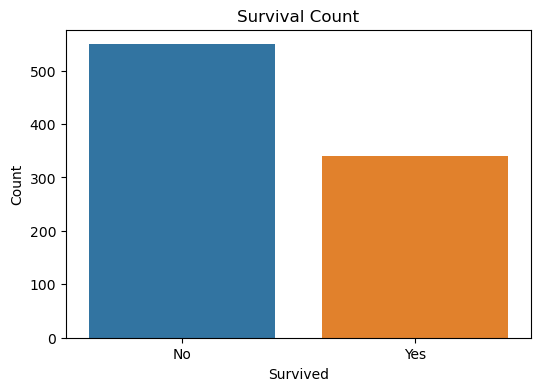

Survival Percentage:
Survived
0    61.754781
1    38.245219
Name: proportion, dtype: float64


In [27]:
#Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=Titanic)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

survival_percentage = Titanic['Survived'].value_counts(normalize=True) * 100
print("Survival Percentage:")
print(survival_percentage)

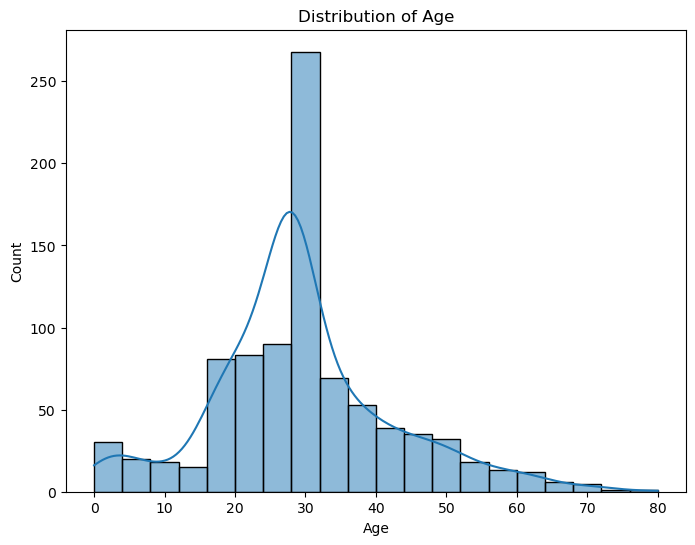

Age Summary Statistics:
count    889.000000
mean      29.299213
std       12.993433
min        0.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [28]:
#Age

plt.figure(figsize=(8, 6))
sns.histplot(Titanic['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

age_summary = Titanic['Age'].describe()
print("Age Summary Statistics:")
print(age_summary)

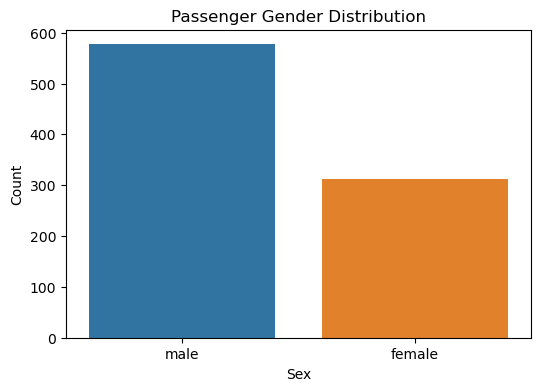

Gender Percentage:
Sex
male      64.904387
female    35.095613
Name: proportion, dtype: float64


In [29]:
#Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=Titanic)
plt.title('Passenger Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

gender_percentage = Titanic['Sex'].value_counts(normalize=True) * 100
print("Gender Percentage:")
print(gender_percentage)

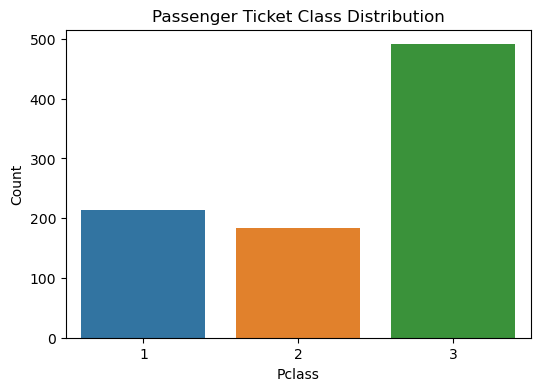

Ticket Class Percentage:
Pclass
3    55.230596
1    24.071991
2    20.697413
Name: proportion, dtype: float64


In [30]:
#Ticket Class (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=Titanic)
plt.title('Passenger Ticket Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

ticket_class_percentage = Titanic['Pclass'].value_counts(normalize=True) * 100
print("Ticket Class Percentage:")
print(ticket_class_percentage)

#### Univariate Summary:

- Survived: About 38% of passengers in the dataset survived.
- Age: The average age of passengers was approximately 29 years, with a standard deviation of around 13 years. The minimum age recorded was 0 (infant), and the maximum age was 80.
- Sex: The dataset consisted of approximately 65% male passengers and 35% female passengers.
- Ticket Class (Pclass): Around 55% of passengers traveled in third class (Pclass 3), 24% in first class (Pclass 1), and 21% in second class (Pclass 2).

##### Bivariate Analysis

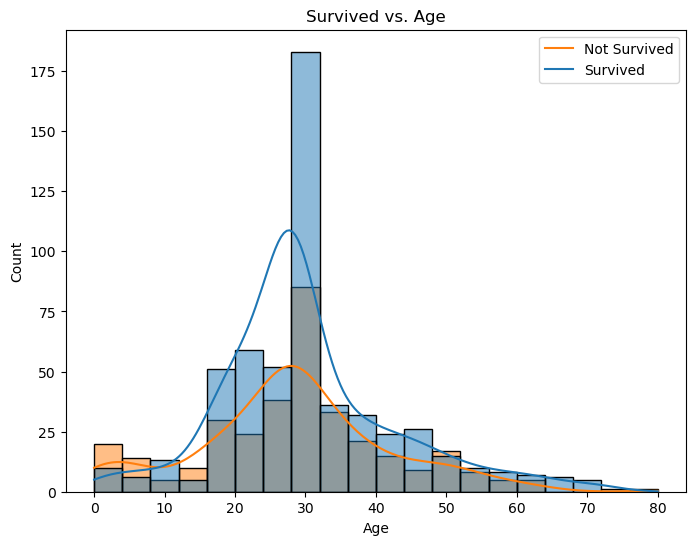

Age Summary Statistics by Survival Status:
          count       mean        std  min   25%   50%   75%   max
Survived                                                          
0         549.0  30.012750  12.493568  1.0  23.0  28.0  35.0  74.0
1         340.0  28.147059  13.702771  0.0  21.0  28.0  35.0  80.0


In [31]:
#Survived vs. Age
plt.figure(figsize=(8, 6))
sns.histplot(data=Titanic, x='Age', hue='Survived', bins=20, kde=True)
plt.title('Survived vs. Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

age_survived_summary = Titanic.groupby('Survived')['Age'].describe()
print("Age Summary Statistics by Survival Status:")
print(age_survived_summary)

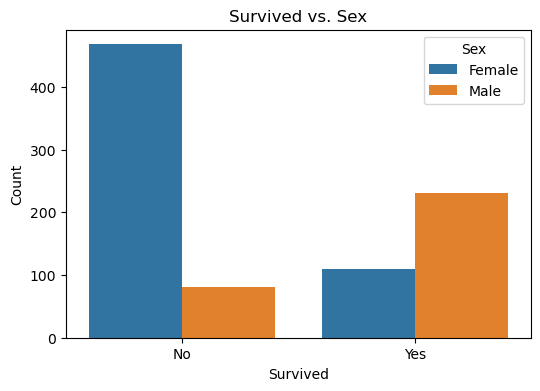

Survival Percentage by Gender:
Sex     Survived
female  1           74.038462
        0           25.961538
male    0           81.109185
        1           18.890815
Name: proportion, dtype: float64


In [32]:
#Survived vs. Sex

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=Titanic)
plt.title('Survived vs. Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

sex_survived_summary = Titanic.groupby('Sex')['Survived'].value_counts(normalize=True) * 100
print("Survival Percentage by Gender:")
print(sex_survived_summary)

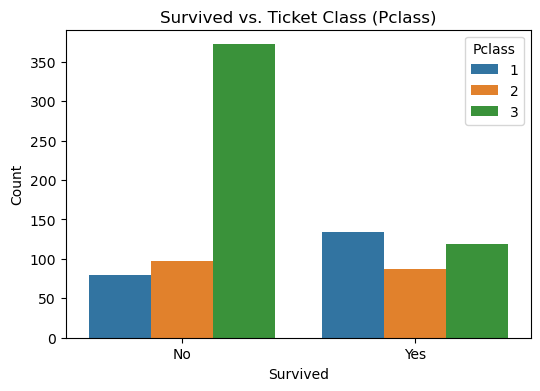

Survival Percentage by Ticket Class (Pclass):
Pclass  Survived
1       1           62.616822
        0           37.383178
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: proportion, dtype: float64


In [33]:
# Survived vs. Ticket Class (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=Titanic)
plt.title('Survived vs. Ticket Class (Pclass)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

pclass_survived_summary = Titanic.groupby('Pclass')['Survived'].value_counts(normalize=True) * 100
print("Survival Percentage by Ticket Class (Pclass):")
print(pclass_survived_summary)

#### Bivariate Summary:

- Survived vs. Age: The median age of passengers who survived and those who did not was around 28 years. However, the age distribution varied, with survivors tending to be slightly younger on average.
- Survived vs. Sex: A higher proportion of females (74%) survived compared to males (19%).
- Survived vs. Ticket Class (Pclass): Passengers in first class had the highest survival rate (approximately 63%), followed by second class (47%) and third class (24%).

##### Multivariate Analysis

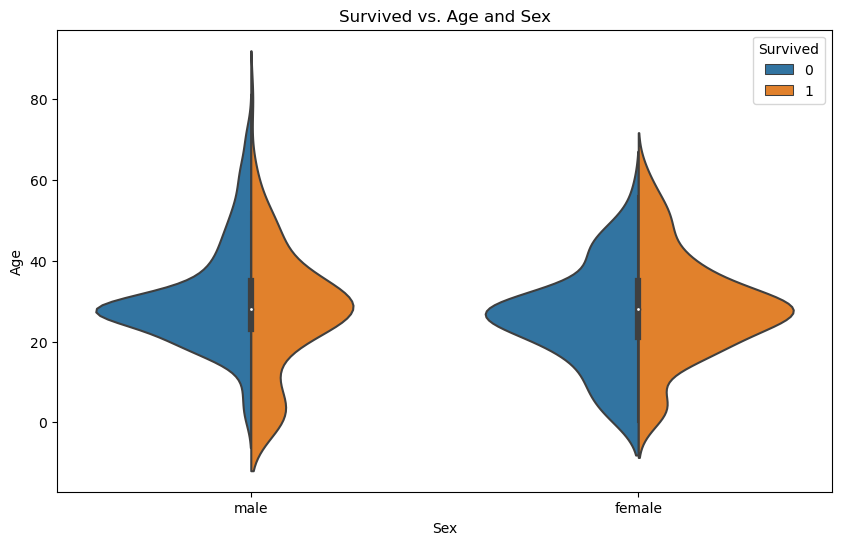

In [34]:
#Survived vs. Age and Sex
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=Titanic, split=True)
plt.title('Survived vs. Age and Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
# plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

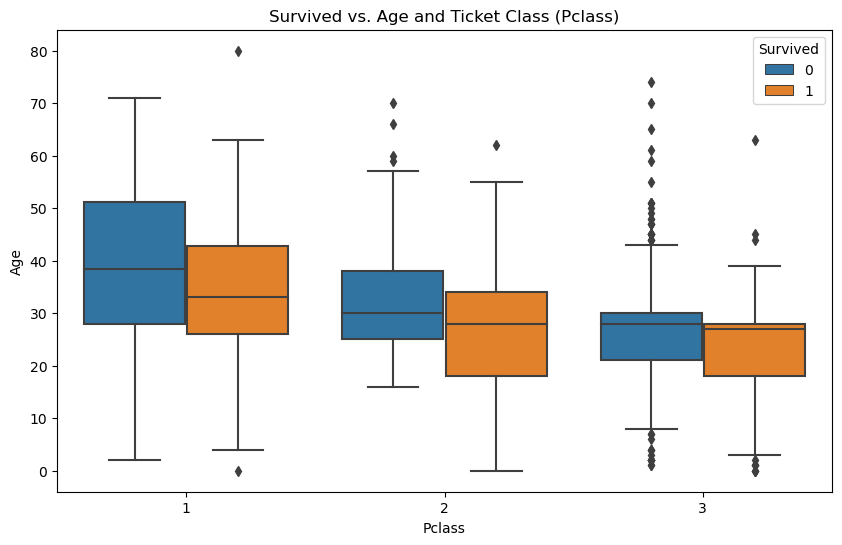

In [35]:
#Survived vs. Age and Ticket Class (Pclass)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=Titanic)
plt.title('Survived vs. Age and Ticket Class (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Age')
# plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

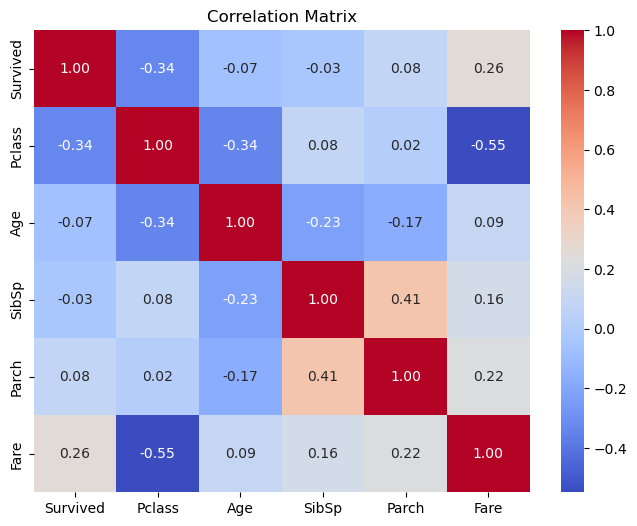

In [36]:
#Correlation between Variables
numerical_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = Titanic[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

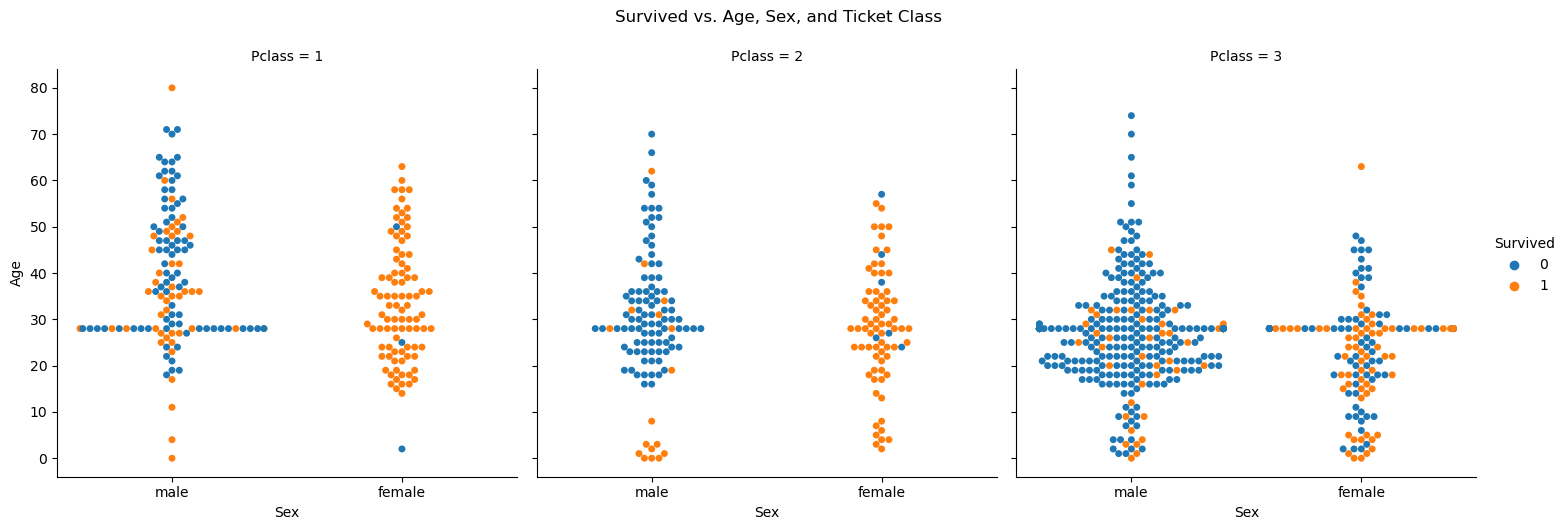

In [37]:
#Survived vs. Age, Sex, and Ticket Class
plt.figure(figsize=(10, 6))
sns.catplot(x='Sex', y='Age', hue='Survived', col='Pclass', data=Titanic, kind='swarm')
plt.suptitle('Survived vs. Age, Sex, and Ticket Class', y=1.05)
plt.show()

#### Multivariate Summary:

- Survived vs. Age and Sex: The violin plot showed that the distribution of ages for both survivors and non-survivors was relatively similar across genders.
- Survived vs. Age and Ticket Class (Pclass): The box plot indicated that the median age of survivors and non-survivors varied across different ticket classes, with some overlap between the age distributions.
- Correlation between Variables: There was a slight negative correlation between ticket class (Pclass) and survival, indicating that passengers in higher classes had a higher chance of survival. Additionally, age and ticket class showed a weak negative correlation.

### Building Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
# Encoding categorical variables
Titanic['Sex'] = Titanic['Sex'].map({'male': 0, 'female': 1})

In [40]:
# Features and target variable
X = Titanic[['Age', 'Sex', 'Pclass']]
y = Titanic['Survived']

In [41]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

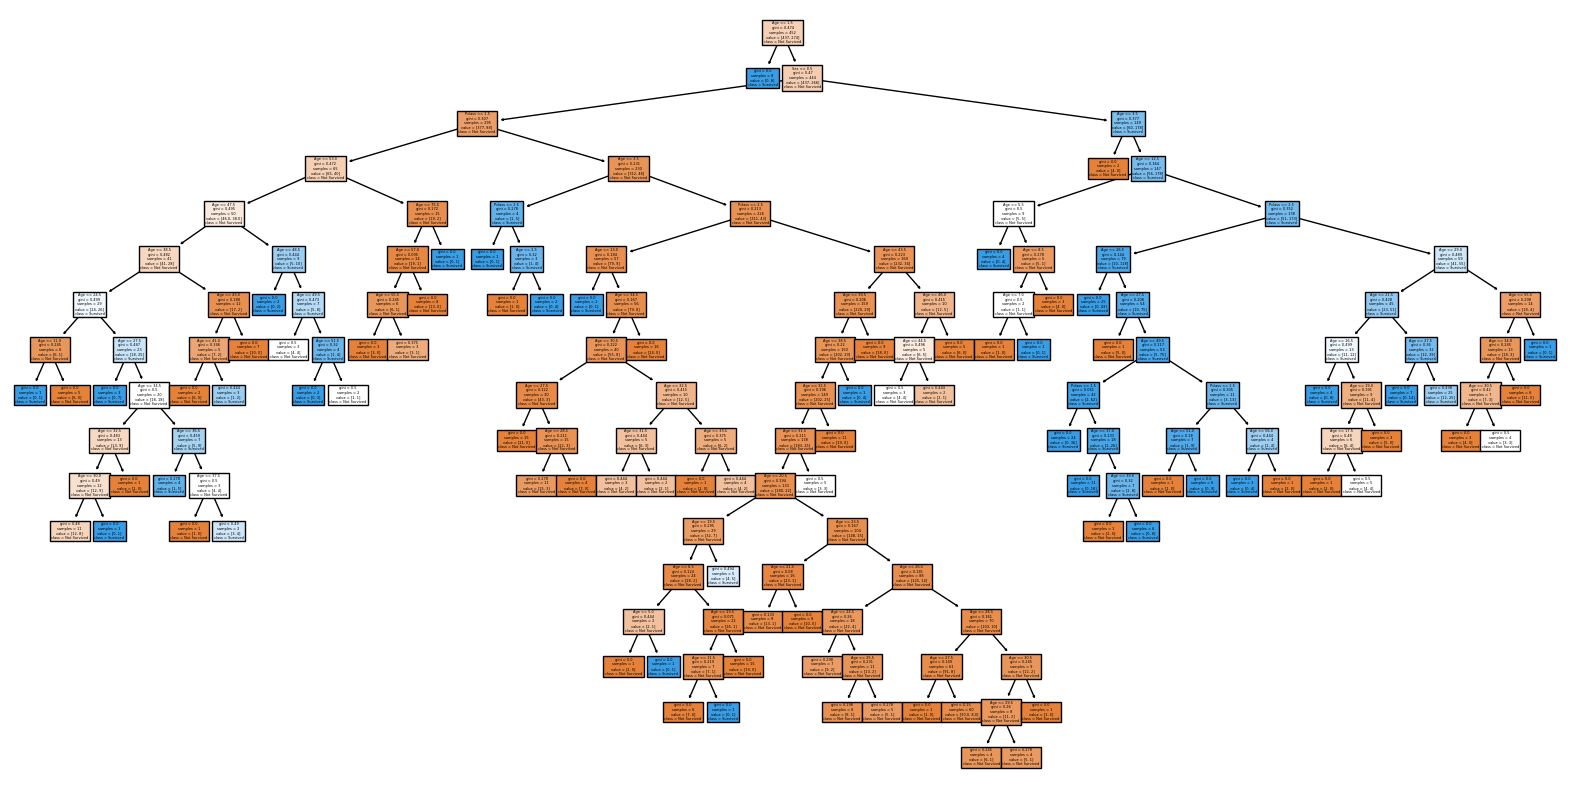

In [42]:
from sklearn import tree

# Selecting a single decision tree from the forest (e.g., the first tree)
single_tree = rf_classifier.estimators_[0]

# Plotting the selected decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(single_tree, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [43]:
# Model Evaluation
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8202247191011236
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       109
           1       0.81      0.70      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[98 11]
 [21 48]]


######  Linear regression model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [46]:
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [47]:
# Model Evaluation - Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7865168539325843
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

Logistic Regression Confusion Matrix:
 [[87 22]
 [16 53]]


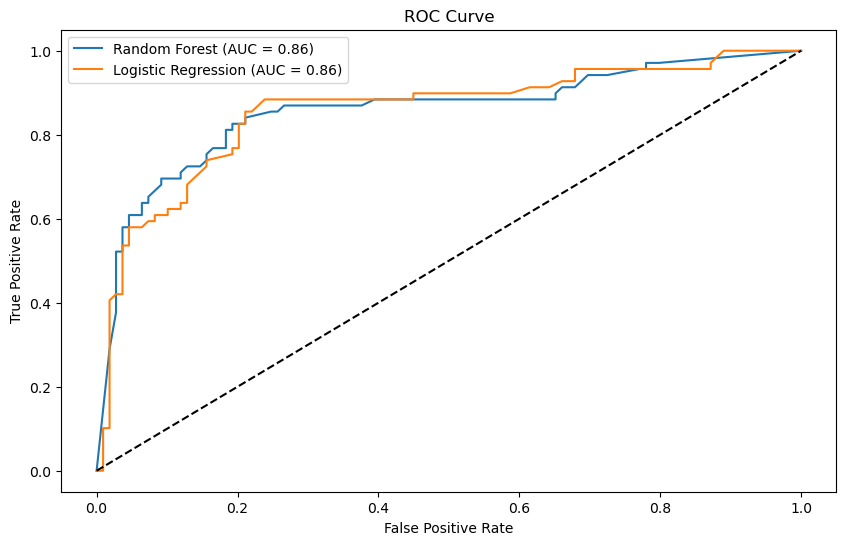

In [48]:
# ROC Curve for both models
y_pred_rf_prob = rf_classifier.predict_proba(X_test)[:, 1]
y_pred_lr_prob = log_reg.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_rf_prob):.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_lr_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Building Models:

- Utilized machine learning algorithms to build predictive models for survival.
- Employed a Random Forest Classifier to predict survival based on features like age, sex, and ticket class.
- Trained the model using the training set and evaluated its performance using metrics like accuracy, precision, recall, F1-score, and confusion matrix.
- Implemented a Logistic Regression model as an alternative approach to predict survival.
- Evaluated the Logistic Regression model's performance and compared it with the Random Forest model using accuracy, precision, recall, F1-score, and confusion matrix.
- Plotted ROC curves to visualize the performance of both models and calculate the Area Under the Curve (AUC) score.

#### Conclusion:

- The Titanic dataset analysis provided insights into factors influencing survival rates among passengers.
- Machine learning models like Random Forest Classifier and Logistic Regression were employed to predict survival based on passenger attributes.
- The Random Forest Classifier achieved an accuracy of 82.02%, outperforming the Logistic Regression model with an accuracy of 78.65%.